# Exercises 3

*Antti Härkönen*

## 1.

a)

The cyclical nature of the graph would mean that causation happens in effect in both directions along the graph,
and this contradicts the definition of a directed graph.

b)

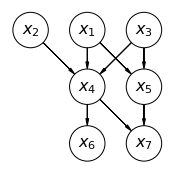

In [7]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.25
pgm = daft.PGM()

pgm.add_node('x1', '$x_1$', 2, 3, scale=scale)
pgm.add_node('x2', '$x_2$', 1, 3, scale=scale)
pgm.add_node('x3', '$x_3$', 3, 3, scale=scale)
pgm.add_node('x4', '$x_4$', 2, 2, scale=scale)
pgm.add_node('x5', '$x_5$', 3, 2, scale=scale)
pgm.add_node('x6', '$x_6$', 2, 1, scale=scale)
pgm.add_node('x7', '$x_7$', 3, 1, scale=scale)

pgm.add_edge('x1', 'x4', directed=True)
pgm.add_edge('x2', 'x4', directed=True)
pgm.add_edge('x3', 'x4', directed=True)
pgm.add_edge('x1', 'x5', directed=True)
pgm.add_edge('x3', 'x5', directed=True)
pgm.add_edge('x4', 'x6', directed=True)
pgm.add_edge('x4', 'x7', directed=True)
pgm.add_edge('x5', 'x7', directed=True)

pgm.render()

## 2.


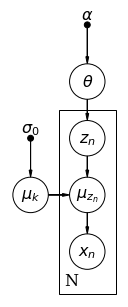

In [3]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.25
pgm = daft.PGM()

pgm.add_node('alpha', r'$\alpha$', 3, 5, fixed=True, scale=scale)
pgm.add_node('theta', r'$\theta$', 3, 4, scale=scale)
pgm.add_node('sigma', r'$\sigma_0$', 2, 3, fixed=True, scale=scale)
pgm.add_node('mu_k', r'$\mu_k$', 2, 2, scale=scale)
pgm.add_node('z', r'$z_n$', 3, 3, scale=scale)
pgm.add_node('mu', r'$\mu_{z_n}$', 3, 2, scale=scale)
pgm.add_node('x', r'$x_n$', 3, 1, scale=scale)

pgm.add_edge('alpha', 'theta', directed=True)
pgm.add_edge('theta', 'z', directed=True)
pgm.add_edge('z', 'mu', directed=True)
pgm.add_edge('sigma', 'mu_k', directed=True)
pgm.add_edge('mu_k', 'mu', directed=True)
pgm.add_edge('mu', 'x', directed=True)

pgm.add_plate([2.5, 0.25, 1, 3.25], 'N')

pgm.render()

$ p(\alpha, \theta, \sigma_0, \mu_k, z_n, \mu_{z_n}, x_n) $
$ = p(\alpha)p(\theta | \alpha)p(\sigma_0)p(\mu_k | \sigma_0) \prod^{N}_{n=1}[p(z_n | \theta)p(\mu_{z_n} | z_n, \mu_k)p(x_n | \mu_{z_n})] $

## 3.

## 4.

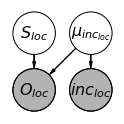

In [3]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.5
pgm = daft.PGM()

pgm.add_node('mean_income', '$\mu_{inc_{loc}}$', 2, 3, scale=scale)
pgm.add_node('real_income', '$inc_{loc}$', 2, 2, scale=scale, observed=True)
pgm.add_node('orthodox', '$O_{loc}$', 1, 2, scale=scale, observed=True)
pgm.add_node('segregation', '$S_{loc}$', 1, 3, scale=scale)

pgm.add_edge('mean_income', 'real_income', directed=True)
pgm.add_edge('segregation', 'orthodox', directed=True)
pgm.add_edge('mean_income', 'orthodox', directed=True)

pgm.render()